# Linear Regression: Pt1

In this Jupyter notebook we're going to:
* Load the boston housing dataset from sklearn
* Graph some of the attributes in the dataset
* Create a linear regression model using OLS

## Step 1: Loading the dataset

User Guide for the dataset is available here: https://scikit-learn.org/stable/datasets/index.html#boston-dataset

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

boston = load_boston()
boston_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
boston_df['MEDV'] = boston['target']

print("The number of rows is:", boston_df.shape[0])
print("The number of columns is:", boston_df.shape[1])

The number of rows is: 506
The number of columns is: 14


From the user guide, some of the columns that might be of interest to us are:


**CRIM** per capita crime rate by town

**ZN** proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS** proportion of non-retail business acres per town

**NOX** nitric oxides concentration (parts per 10 million)

**RM** average number of rooms per dwelling

**AGE** proportion of owner-occupied units built prior to 1940

**DIS** weighted distances to five Boston employment centres

**RAD** index of accessibility to radial highways

**TAX** full-value property-tax rate per $10,000

**MEDV** Median value of owner-occupied homes in $1000’s



In [2]:
boston_df[['RM', 'AGE', 'MEDV']]

,RM,AGE,MEDV
0,6.575,65.2,24.0
1,6.421,78.9,21.6
2,7.185,61.1,34.7
3,6.998,45.8,33.4
4,7.147,54.2,36.2
...,...,...,...
501,6.593,69.1,22.4
502,6.120,76.7,20.6
503,6.976,91.0,23.9
504,6.794,89.3,22.0


## Step 2: Plotting House Price against Number of Rooms

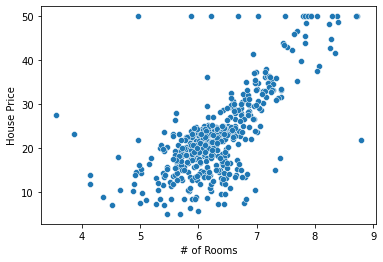

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def thousands(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fK' % (x)

formatter = FuncFormatter(thousands)
def add_plot_labels(ax, xlabel="# of Rooms"):
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("House Price")

fig, ax = plt.subplots()
sns.scatterplot(x='RM', y='MEDV', data=boston_df[['RM', 'MEDV']])
ax.set_xlabel("# of Rooms")
_ = ax.set_ylabel("House Price")


## Step 3: Plotting House Price against Age

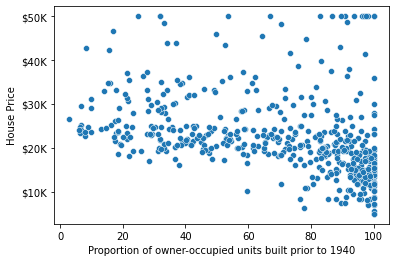

In [4]:
fig, ax = plt.subplots()
sns.scatterplot(x='AGE', y='MEDV', data=boston_df)
add_plot_labels(ax, xlabel="Proportion of owner-occupied units built prior to 1940")

## Step 4: Linear Regression using OLS

We're going to run linear regression using House Price (MEDV) against number of rooms (RM)

We'll use the library 'sklearn' for this. 

In [5]:
from sklearn.linear_model import LinearRegression

X = boston_df[['RM']]
y = boston_df[['MEDV']]
model = LinearRegression().fit(X, y)

### Making a prediction

In [6]:
y_hat = model.predict(X)

In [7]:
y_hat.shape

(506, 1)

In [8]:
df = pd.DataFrame({'Actual': y['MEDV'].values})
df.head() 

,Actual
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [9]:
df['Predicted'] = y_hat
df.head()

,Actual,Predicted
0,24.0,25.175746
1,21.6,23.774021
2,34.7,30.728032
3,33.4,29.025938
4,36.2,30.382152


In [10]:
df['Abs_diff'] = df.diff(axis=1)['Predicted']*1000
df.head()

,Actual,Predicted,Abs_diff
0,24.0,25.175746,1175.745775
1,21.6,23.774021,2174.020992
2,34.7,30.728032,-3971.967747
3,33.4,29.025938,-4374.062126
4,36.2,30.382152,-5817.847888


## Step 5: Visualisation 
The easiest way to visualise the regression line is to use the seaborn package

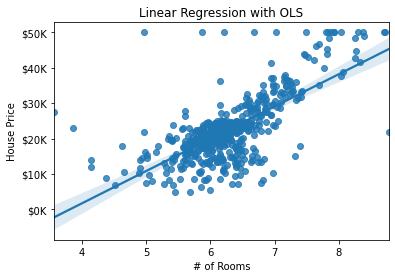

In [11]:
fig, ax = plt.subplots()
sns.regplot(x="RM", y="MEDV", data=boston_df)
ax.set_title("Linear Regression with OLS")
add_plot_labels(ax, xlabel="# of Rooms")

So there you have it, your first Linear Regression model! Congratulations!